In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
dataset=pd.read_csv('winequality-red.csv')

In [262]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [263]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [265]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [266]:
dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [267]:
dataset['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [268]:
for i in dataset['quality']:
  if (i>5) or (i==5):
    dataset['quality']=dataset['quality'].replace(i,1)
  else:
    dataset['quality']=dataset['quality'].replace(i,0)

dataset['quality'].value_counts()

quality
1    1536
0      63
Name: count, dtype: int64

In [269]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [270]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.052152
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.222189
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.101214
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.020995
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.035570
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,0.073818
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,0.074046
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,0.006220
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.095809
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.078792


<Axes: >

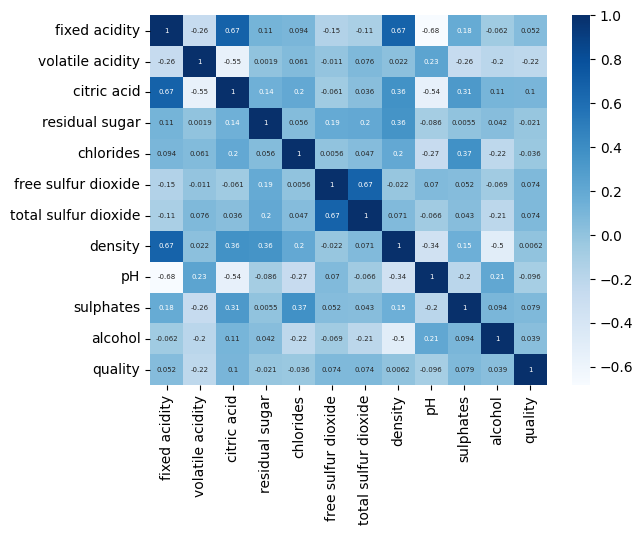

In [271]:
sns.heatmap(dataset.corr(),cmap='Blues',annot=True,annot_kws={"fontsize": 5}  )

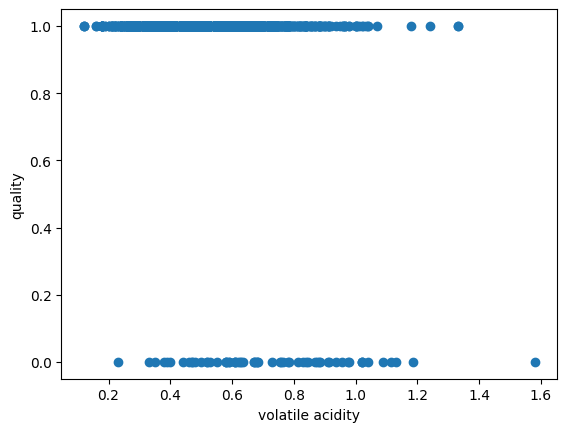

In [272]:
#With respect to quality,volatile acidity is negatively correlated
plt.scatter(dataset['volatile acidity'],dataset['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

In [273]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [275]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [276]:
print(X_train)
print(X_test)

[[ 0.03570115  1.17013908 -0.82797173 ... -0.77068411  0.91195248
  -0.75660071]
 [-0.42519441 -0.54734879  0.09751438 ...  0.59078753 -0.10608706
  -0.85048089]
 [ 0.03570115  0.16145573 -1.18788299 ... -0.57618817 -1.2372421
  -0.75660071]
 ...
 [-0.25235857  0.21597915  0.20034617 ... -0.12236428  0.1767017
  -0.85048089]
 [ 2.68585058 -0.32925509  1.12583228 ... -0.0575323   0.12014395
   2.15368509]
 [ 0.84226836  2.45143956  0.25176207 ... -0.38169222 -1.01101109
  -0.94436108]]
[[ 1.41838781 -0.32925509  0.81733691 ... -0.90034808  0.57260597
   0.36996154]
 [-0.13713469  1.57906477 -1.39354657 ...  0.3314596  -0.72822233
  -0.75660071]
 [ 0.43898476 -1.31067673  0.30317796 ... -0.31686023  1.02506798
   1.21488322]
 ...
 [-0.59803024 -0.90175105  1.12583228 ...  0.3314596   0.68572147
   0.55772191]
 [ 4.18376113  0.84299854  2.51406145 ... -2.3266517   0.12014395
   0.74548229]
 [-0.42519441 -0.54734879  0.09751438 ...  0.59078753 -0.10608706
  -0.85048089]]


In [283]:
y_test

1109    1
1032    1
1002    1
487     1
979     1
       ..
489     1
362     1
526     1
442     1
1229    1
Name: quality, Length: 400, dtype: int64

In [277]:
print(X_train.shape)
print(y_train.shape)

(1199, 11)
(1199,)


In [278]:
#Using Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


#96%

[[  0  16]
 [  0 384]]


0.96

In [279]:

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-0.0416666666666663


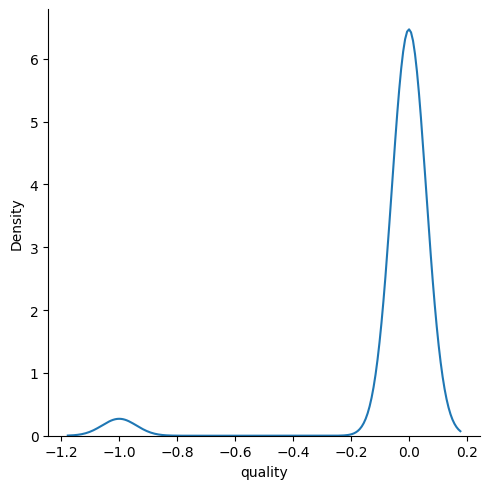

In [280]:
residuals=y_test-y_pred
residuals
sns.displot(residuals,kind="kde")

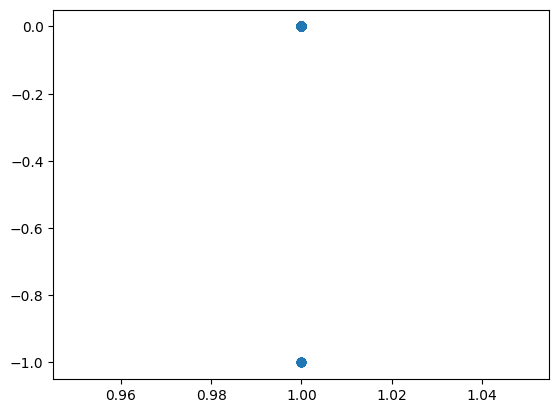

In [281]:
plt.scatter(y_pred,residuals)

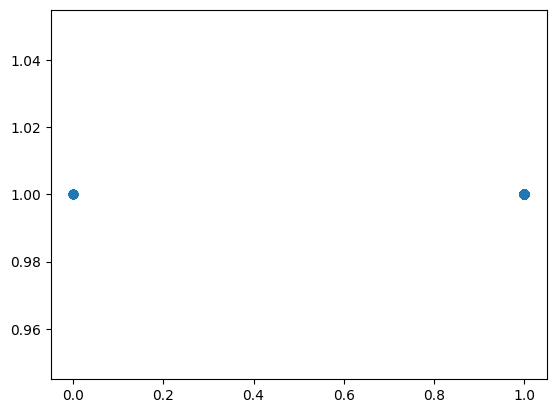

In [282]:
plt.scatter(y_test,y_pred)

In [258]:
#Using Kneighbors classifier
"""
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
"""
#96%

[[  0  16]
 [  0 384]]


0.96

In [259]:
"""
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#-0.0416
"""

-0.0416666666666663


In [213]:
#Using Support Vector Machine
"""
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
"""
#96%

"\nfrom sklearn.svm import SVC\nclassifier = SVC(kernel = 'linear', random_state = 0)\nclassifier.fit(X_train, y_train)\ny_pred = classifier.predict(X_test)\nfrom sklearn.metrics import confusion_matrix, accuracy_score\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\naccuracy_score(y_test, y_pred)\n"

In [214]:
#Using Kernel SVM
"""
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
"""
#96%

"\nfrom sklearn.svm import SVC\nclassifier = SVC(kernel = 'rbf', random_state = 0)\nclassifier.fit(X_train, y_train)\ny_pred = classifier.predict(X_test)\nfrom sklearn.metrics import confusion_matrix, accuracy_score\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\naccuracy_score(y_test, y_pred)\n"

In [215]:
#Using Naive Baye
"""
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
"""
#94%

"\nfrom sklearn.tree import DecisionTreeClassifier\nclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)\nclassifier.fit(X_train, y_train)\ny_pred = classifier.predict(X_test)\nfrom sklearn.metrics import confusion_matrix, accuracy_score\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\naccuracy_score(y_test, y_pred)\n"

In [216]:
#Using Decision Tree Classifiers
"""
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
"""
#94%

[[  1  15]
 [  8 376]]


0.9425

In [217]:
#Using Random Forest Classification
"""
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
"""
#95.75%

[[  0  16]
 [  1 383]]


0.9575